# COGS 188 - Final Project

# Adversarial AI Training with Multiplayer Tetris

## Group members

- Kendrick Nguyen
- Anh Tran
- Eric Song

# Abstract 

Multiplayer Tetris is an adversarial task with complex interactions inside individual game states in addition to complex interactions between the game states of the agents. Tetris is particularly complex because of its potentially infinite nature and because of strict rulesets that reward certain types of performance. Examples of this include T-Spins and doing a “Tetris” (four line clear). Our goal is to implement various reinforcement learning algorithms in order to train a model capable of not only playing Tetris, but also being able to play it in a competitive environment. Our first metric of performance will be survival duration and score (with predefined rules on how a score will be generated from clearing lines in the game). Then, our metric for adversarial tasks will include winning as well as comparisons such as score differential. 

# Background

Alexey Pajitnov invented the first playable version of Tetris in 1985 <a name="chip"></a>[<sup>[1]</sup>](#chip). This popular and classic game comes with fairly simple rules–there is a predetermined set of ways that the current piece can move and a predetermined set of interactions this piece can have with other pieces<a name="design"></a>[<sup>[4]</sup>](#design). Scoring is determined by combinations of pieces and the number of lines that are cleared<a name="design"></a>[<sup>[4]</sup>](#design).  Cleared lines (i.e. filled-in horizontal lines with pieces) disappear from the board. Together, these rules create this survival game where the player tries to keep stacking and clearing lines. The game ends when the height of the player's stack crosses a certain threshold or if no new pieces can spawn in without clipping existing pieces on the board <a name="tetriswiki"></a>[<sup>[3]</sup>](#tetriswiki). Because the game gravity speeds up and the pieces appear and drop faster and faster, it is impossible for a human player to play the game forever (in fact, this question on the feasible of infinite Tetris Games has even inspired research papers <a name="tetriswiki"></a>[<sup>[3]</sup>](#tetriswiki)). 

Using reinforcement learning to teach an AI how to play Tetris has been explored before. Papers such as the following: https://cs231n.stanford.edu/reports/2016/pdfs/121_Report.pdf and other projects such as this one: https://rex-l.medium.com/reinforcement-learning-on-tetris-707f75716c37 explore the implications of deep learning with neural networks and reinforcement learning algorithms on Tetris <a name="rl"></a>[<sup>[6]</sup>](#rl) <a name="medium"></a>[<sup>[5]</sup>](#medium). Perhaps these algorithms can overcome the human limitations on playing this classic game. In these projects, the authors played Tetris in a single-player mode where the objective is to stay alive and keep clearing pieces. Our project seeks to extend these previous works to a multiplayer environment. 

Since the development of the original Tetris game, countless new versions have been created with different objectives. Among these include games such as Tetris 99, where the objective is to not only stay alive, but to also send pieces to your opponents (these pieces are called “garbage”) <a name="tetris99"></a>[<sup>[2]</sup>](#tetris99). This adversarial-type task differs from the previous works where the agent only sought to stay alive. Our goal is that perhaps we will observe emergent behaviors from this process that emulate how players play in the wild. Perhaps we will see the AI learn to hold back pieces in order to create a large, overwhelming wave of garbage. Perhaps we will see more complex piece movement in order to chain combination attacks such as T-Spins. 

# Problem Statement

The scope of this project's goal is to develop an AI to optimally play and compete in a multi-player game of Tetris. Unlike the original Tetris game, multiplayer Tetris games, such as Tetris 99, presents the additional challenge of outlasting your opponent and delivering combos to inhibit your opponent’s survival. This project hopes to train an AI in a multiplayer Tetris game environment and in an adversarial manner. Training and progression of the AI occurs during a match against another AI agent where either agent is rewarded/penalized based on the victory and game score. Each agent will have their own model or algorithm to output their discrete in-game moves and hopefully to continue to refine after every match.

# Data

The data that we used came from the SimpleTetris implementation in the OpenAI Gym <a name="simple tetris"></a>[<sup>[1]</sup>](#simple_tetris).

The observation space is composed of  $\text{width} \times \text{height}$ numpy arrays that represent different states. In this case, we have a $10 \times 20$ sized array. This observation space is discrete. Similar to the observation space, the action space is also discrete with seven possible actions to choose from. 

A key part of this implementation is that it gives us greater flexibility in controlling the rewards of the various states and actions associated with these states. 

Reward Table:
- reward_step
    - Adds a reward of +1 for every time step that does not include a line clear or end of game.
    - This encourages the agent to continue to choose moves that ensure its longevity.
- penalise_height
    - Penalizes the height of the current Tetris tower every time a piece is locked into place. A negative reward equal to the height of the current tower is given.
    - This encourages the agent to minimize the height of their tower; an emergent behavior of this goal would potentially be something like clearing lines over and over again, leading to smaller combos.
- penalise_height_increase
    - Penalizes an increase in the height of the Tetris tower. Every time a piece is locked into place, if the height increases then a negative reward equal to the increase is given.
    - This is an alternate penalty to the penalise_height, the environment either supports one or the other. Both penalties encourage keeping the height of the stack low in different ways, perhaps an emergent behavior of penalizing a height increase would be keeping the stack as small as possible each time (and thus encouraging potential combos). 
- advanced_clears
    - Changes the rewards for clearing lines to be similar to the modern Tetris system. The new rewards are 100 for a single line clear, 250 for a double line clear, 750 for a triple line clear and 3000 for a Tetris (quadruple line clear).
    - This incentivizes the agent to balance between the height penalty and the clearing reward.
- high_scoring
    - Changes the reward given for each line clear to 1000.
    - This encourages the agent to clear lines rather than just survive. 
- penalise_holes
    - Penalizes the number of holes in the current Tetris tower every time a piece is locked into place. A hole is an empty cell with at least one non-empty cell above it.
    - This encourages the agent to keep their stacking clean (as defined by minimizing the number of holes)
- penalise_holes_increase
    - Penalizes an increase in the number of holes in the current Tetris tower every time a piece is locked into place.
    - Like penalise_holes, this punishes the agent for not having a clean stack. Since it is only penalizing an increase in holes, perhaps, analogous to penalise_height_increase, we would see more future planning behavior. 

Note: the descriptions come from the environment description <a name="simple tetris"></a>[<sup>[1]</sup>](#simple_tetris). and the commentary for each description are our own thoughts on how they might influence the behavior of the agent. 


# Proposed Solution

The project will be exploring various algorithms and techniques to teach the agents to play and compete in Tetris in an adversarial manner.

NeuroEvolution of Augmenting Topologies (NEAT): NEAT is a genetic algorithm-based technique for evolving neural networks, similarly inspired by human evolution or natural selection. The training will consist of a population of very simple AI agents that are paired with one and another. The paired agents will be trained adversarially, competing against each other. All paired agents across the population are evaluated on a criteria called the fitness which is determined based on their victory and score. The agent that wins within their respective pair will be chosen to play against other victorious agents (similar to a tournament bracket). The grand winner of population (or the most “fit”) will represent one training iteration and proceed to play another iteration against a new generation of agents. The training progresses by mutating and cross-overing (choosing the best parameters and characters) of the winning agent to create a new population. Thus, for every generation the previous winning agent will compete against other agents that are slightly better. To test performance of AI after X-generations, another victorious AI from a previous generation could be compared/competed against; alternatively, a brute force AI could be compared/competed against as well.

Q-Learning: A reinforcement algorithm that consists of either exploring new actions to learn more about the environment (exploration) or exploiting its current state to select actions that are known to yield high rewards (exploitation). It uses a Q-table to determine the next optimal action and reward, to transition to the next game-action it uses a general formula

$Q(s, a) ← Q(s, a) + α * [r + γ * max(Q(s', a')) - Q(s, a)]$

Where 

- s is the game-state
- a is the discrete action
- α (alpha) is the learning rate
- γ (gamma) is the discount factor

Before using the genetic algorithm for adversarial training, we will explore the problem space with single-agent training. This training will be done with the variants of Q-learning such as Q-learning, DQN, and double Q-learning. We can evaluate the performance of these algorithms based on where they converge and how they end up performing in the Tetris environment.

Deep Q-learning (DQN): As an extension of Q-learning where we use deep neural networks to approximate Q-values function where Q-table isn’t needed. By using neural networks, it maps state-action pairs to their expected future rewards. DQN also uses experience replay target network to randomly sample from past experience and target network to generate target Q-values for training. The neural network can effectively capture the complex and high-dimensional state representation of the Tetris board. In addition, the Tetris environment is very dynamic which can be mitigated by experience replay and target network to stabilize the learning process.

Double Q-learning: The overestimation bias in standard Q-learning, where the maximum Q-value for the next state is overestimated is addressed with double Q-learning due to having to separate Q-value functions Q1 and Q2. One function is used to select an action, and the other is used to evaluate the value of that action. The bias is reduced due to having two separate estimations, leading to more accurate Q-value updates and potentially more stable learning. Double Q-learning reduces overestimation bias and can lead to more accurate value predictions, which can be beneficial for making better decisions in Tetris complexity. Having two Q-functions also helps stabilize the learning process, which is important for environments with highly variable rewards and states, such as Tetris


# Evaluation Metrics

The metrics that we will be using to test how well the AI performs its task of playing tetris against another AI opponent would be the scoring that it accumulates from stacking and creating a “line clear” for points. Additionally, by clearing a 2, 3, or 4 lines and “combo” consecutively, the points for would increase correspond to the “line clear” and “combo”. The crucial part of tetris playing with an opponent would be when “line clear” is achieved, “trash” would be generated on the opponent's side. The agent is to make optimized moves in which they play to “line clear” to keep on playing and stacking up “trash” on the opponent's side in order to make the opponent's game more difficult and end their game early. 

The reward for each move is to set up the pieces in order to create many chances to combos. The scoring for line clear is important but it ultimately matters more when “trash” is generated on the opponent’s side. Therefore, setting up the board to do 4 stack line clears or setting up combos will earn the most reward.

Each reward will be additionally modified by performance discounts, such as number of holes, uniformity of heights, and the aggregate height, that can hinder play. 

$$reward = reward + 100*(\text{num_line_clears}) - 10*(\text{holes_delta}) - 5*(\text{height_delta})$$

# Results

### Subsection 1: Training with Q-Learning (tabulation, epsilon-decay)

One immediate challenge that we encountered was formulating a proper Q-table that could handle the state and action spaces of the Tetris environment.

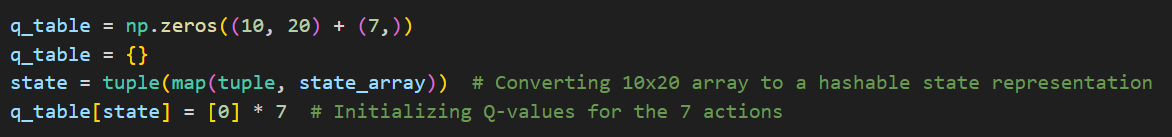

To do so, we created a dictionary that hashed states to match them with various actions. This way we could get these state action pairs without creating a massive numpy matrix. Even with this consideration, and with using pickle as efficiently as possible, we ran in to severe memory constraints.

Graph Description:

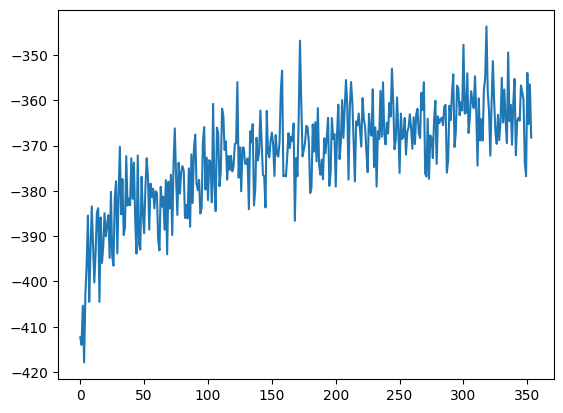

Here, we plotted the average rewards per hundred episodes over 35,000 episodes. 35,000 episodes was basically the upper limit of how much we could train our data (this was a hardware constraint). We see potentially some convergence, even though the score is ultimately negative. There does seem to be a fair bit of variance in the rewards as well.

One other important thing to mention is that in our epsilon-decay Q-learning, we start off the epsilon as $1.0$. This is to encourage as much exploration as possible in order for our agent to get a sense of the environment. Within 5000 episodes, you can see a drastic increase in the reward before tapering off. This training took around 20 minutes.

To reference and reimplement our results, see `testing.py` for more information. Some of the code remains uncommented for clarity, but (like the code displayed above) should be commented out to run the file.

### Subsection 2: Training with DQN

We use stable-baseline-3 as a way to train our agent on the SimpleTetris environment. The code can be references and followed along with in `premade.ipynb`. Although we did not write this implementation of DQN, it served as a comparison to the tabulation Q-learning that we wrote in the prior subsection. The trained models for 100,000, 500,000, and 3,000,000 time steps can be found in our models folder (tetris_100000.zip, tetris.zip, and tetris_3000000.zip, respectively).

Below, we display the reward over the last 1000 episodes of the training.

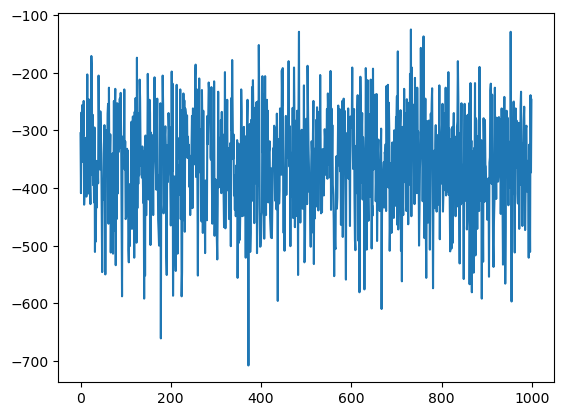

The variance is quite high in this quite high compared to the previous subsection, yet we see that the score is also potentially significantly better. This falls in line with some of the other literature we have seen where DQN was used as a way to solve Tetris. This result took around 65 minutes to acquire. Although it was significantly longer than the tabulation Q-learning, it is also a result of being able to train longer. With DQN, we were no longer constrained by a huge state space. 

### Subsection 3: Adversarial Training with Double Q-learning

The double Q-learning was implemented in the tetris environment with Q1 and Q2 Q-table of agent and adversary created with the state size flatten. The state_to_index was implemented in order to converts the flatteneded state to an index for the Q-tables. We utilized epsilon-greedy policy until 0.4 to encourage exploration while sticking more to what work. Training loop are initiated with the double Q-learning equation, select action, and update Q-values. Then save the training process.

Implement training process, run

`python double_q.py`

and to implement the learning, run

`python test_double_q.py`

The hyperparameters located at the top of `double_q.py` (learning rate, explore/exploit, etc.)

![double_q1.png](Tetris/double_q1.png)
![double_q.png](Tetris/double_q.png)

The first picture show the total reward accumulated after 1000 episodes when we first test it, prior to changing the environment reward for failing and creating holes. This result is pretty bad as it doesn't seem like the agent or adversary is trying to maximize it's winning by getting line clear or setting up with out holes. The bottom graph is when it is run with 4000 episodes and the rewards and changed.

### Subsection 4: Adversarial Training with NEAT

To train our agents to Tetris adversarially, we created an even population of 500 genomes where every two genome will play Tetris against each other. Penalization via player can occur if a genome successfully clear line(s). For one generation, there can only be two elite genomes that can be selected to play in the next generation (and be cross-mutated to create "better" genomes). Like in a traditional, multiplayer tetris game, the genomes will three games; thus, the rewards/scres will be cumulative across the three games.

To implement the training process, run

`python NEAT.py`

To implement the best model, run

`python NEAT_best.py`

You can modifiy rendering and hyperparameters (ex. generations, population, etc.) in the script or in the `assets/config.txt` file.

Generation 0 | Generation 50
:-: | :-: 
![alt](outputs/neat_start.gif) | ![alt](outputs/neat_best.gif)

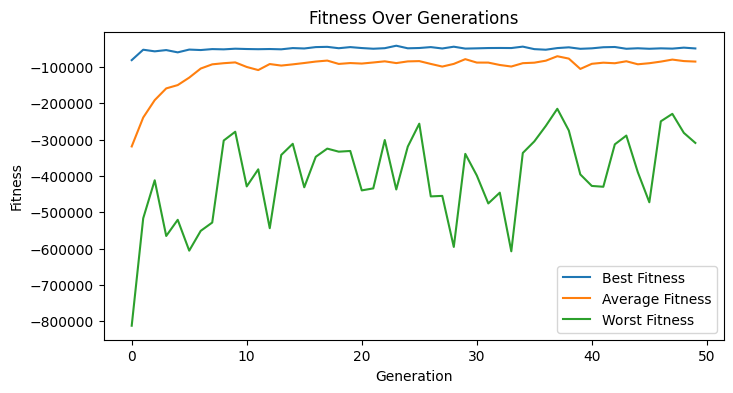

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

neat_metrics = 'outputs/training_log_static.csv'
neat_df = pd.read_csv(neat_metrics)

plt.figure(figsize=(8, 4))

plt.plot(neat_df['Generation'], neat_df['Best Fitness'], label='Best Fitness')
plt.plot(neat_df['Generation'], neat_df['Average Fitness'], label='Average Fitness')
plt.plot(neat_df['Generation'], neat_df['Worst Fitness'], label='Worst Fitness')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations')
plt.legend()

plt.show()

Unfortunately, the NEAT algorithm did not perform as expected, as it seems like it was more biased in selecting "hard drops" or "spins" as the most optimal move. We do observe however that each genome's neural network does start to learn to avoid random moves to increase its fitness/rewards for the next generation. However, these fitness scores stagnate at -5000 on average. In fact, each generation seems to achieve at most negative rewards as unfortunately failed to achieve a line clear.

Our attempts to address the bias in "hard drops" or "spins" was to heavily penalize the fitness score if there was an increase in holes and non-uniformity in heights (bumpiness). However, there was very miniscule change.

# Discussion

### Interpreting the result

Since our Q-learning with tabulation is bottlenecked by memory, it seems that in general, it is unsuitable for environments that have extremely high numbers of state-action pairs. We do see improvement to the beginning where there is totally random guessing, perhaps if we were not constrained by memory we could eventually see a significant performance increase. To extrapolate this to an adversarial task, Q-learning with tabulation is definitely unsuitable (especially considering how the agent needs to consider its own state space on top of its opponents state space).

DQN shows a lot more promise for an adversarial task. Although we had some hardware constraints, they were not insurmountable (as it was with the tabulation Q-learning). In terms of adversarial Tetris, this shows a lot more promise than Q-learning. We see potential convergence at a better optima, although there did seem to be some stability issues. This would warrant further exploration.

The double Q-learning seem to fail due to Tetris having a large state space, and flattening it causes an abstract representation of the state. It is in high dimension and therefore a lot more difficult to handle with simple Q-table. Reward shaping adjust it earning rewards from fitting the pieces correctly or mitigating the holes would have boosted the training process. Hyperparameters tuning like learning rate, discount factor and epsilon decay should be tuned to better fit the process.

Although our NEAT Tetris implementation proved to be unsuccessful, we believe that further refinement, such as the adjusting NEAT configurations hyper-parameters, providing board statistics as inputs, and further training/generations, could provide a working solution for training a Tetris AI adversarially. These adjustments could address the certain move bias we have observed at the stagnated 50th generation, as each genomes were failing to learn optimal moves by reducing holes and height non-uniformity. Adding these adjustments could improve each genome’s performance in learning the board’s spatial features for instance, avoiding more harsh penalties in its fitness scores.

### Limitations

There were several limitations with the work done on the single-player Tetris side. Implementing Q-learning with tabulation rather than deep learning is a particularly difficult problem simply from the memory perspective. From our experience, it seems that there were $7 * 2^{200}$ different possible state-action pair representations. Of course, the actual number of states that will ever realistically appear is less than that, but this number is an appropriate upper bound: $7 \times 2^{H \times W}$ (for instance, it is not possible to have a state with an entirely filled up row because that would become clear and disappear). As shown in our code (testing.py), we could not simply declare a Q-table. Instead, we had to hash each state that we encountered and assign them a list representing each possible action. This way, we could build up state-action pairs of states that we had encountered before. Aside from convergence issues, one of the biggest challenges we faced was simply storing our Q-table to use for later. Since GitHub has a 2 GB limit on file sizes, we were unable to show all of our q_table.pkl files, which gives an anecdotal sense for how numerous the state-action pairs are. With 50,000 episodes run (before crashing trying to store the Q-table), we got more than 2 GB of data to store. With 10,000 episodes, we had around 1.6 GB of data. Since we were so constrained by memory, it would be an interesting extension to see just how much better our Q-learning could be if we had the computational resources to keep going. Using stable-baseline-3’s implementation of DQN, it was easy to see how deep learning is a much more convenient way to approach this problem (from a purely memory resource perspective). Q-learning is definitely less suitable for training in an adversarial environment; if the agent needs to keep track of their own states and their opponents states, that is $7 * 2^{400}$ (in our case) tabs we need to create. As a result, we shift our focus to deep learning and genetic algorithms. 

For double Q-learning, the main limitation is similar to Q-learning where Q-table is the main way it store information. This is important as Tetris state space is huge and difficult to explore it all in a short amount of time before things stack up even with another Q is there to stabilized it.

For our NEAT experiment, we hope to overhaul and explore better implementations for determining the optimal action and fitness score (with penalty for bad habits). These adjustments would probably work towards overhauling the hyperparameters in our NEAT configuration, especially with the inputs, population size, max_stagnation, etc. Our initial approach with the NEAT algorithm was to also feed the entire board array into the input, resulting in a size 200. I believe that each genomes’ neural network was not able to learn optimal actions as it couldn't determine spatial features, such as holes, bumpiness, and uniformity in heights. A better solution could be feeding this in-game info directly, so that each genomes has the bare minimum to learn (while also speeding up the learning process). Another potential adjustment would be evaluating each genome step by providing all potential valid moves and their respective scores similar to Q-learning. In this case, the genome would activate their neural network by selecting the inputs corresponding to the move that provides optimal score and next observation space. 

### Ethics & Privacy

This project is meant to be purely an academic exercise. One ethical concern is potentially creating cheating tools for popular online multiplayer games such as tetr.io or Tetris 99. To alleviate these concerns, we are going to make sure that our code only performs as expected with a very specific environment that we create ourselves. As with all other AI created to dominate their specific game, it is important to keep in mind that they are not meant to be used for another player to gain an unfair advantage over the other players. Another concern would be potential copyright infringement. We have no intention to market this game as our own and we will endeavor to keep our work for private, academic use. 

This project does utilize a public repository that provides an environment wrapper for OpenAI’s Gym Tetris environment, https://github.com/tristanrussell/gym-simpletetris/tree/master/gym_simpletetris/envs. We at most modified this wrapper to support adversarial training and custom rewards. All credits belong to the author and OpenAI for the Tetris game environment. 

### Conclusion

In an adversarial task, it is important for the agent to know its own state space as well as the state space of their opponent. For human players, they can see and strategize around this (for instance, https://www.youtube.com/watch?v=upHkwQrNnUc is a great video on high level adversarial Tetris game play). Genetric algorithms like NEAT are one promising avenue for solving this problem since they are trained to play against each other. This might allow them to pick up on hidden patterns that human players recognize; with enough training and properly set up rewards and environments, we should expect to see further improvement in this behavior. For Q-learning with tabulation, our results show pretty clearly that this avenue is unsuitable for the adversarial task, let alone for the single player task. It seems that there is a high memory constraint that makes it not very practical to train for Tetris. Deep learning methods also show promise. In our single player task, we did not encounter the same issue with the memory constraint. Potentially, with some reworking, it would be feasible to train two deep learning networks against each other. Conceptually analogous to perhaps GAN models for image generation, it is possible that the models will improve enough to be competitive to human players. 

# Footnotes
<!-- <a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br>  -->
<a name="chip"></a>1.[^]BBC NEWS. (n.d.). Tetris: A Chip off the Old Bloc. Retrieved May 3, 2024, from http://news.bbc.co.uk/2/hi/uk_news/magazine/3479989.stm<br>

<a name="tetris99"></a>2.[^]Contributors to Wikimedia projects. (2024a, April 8). Tetris 99. Wikipedia. https://en.wikipedia.org/wiki/Tetris_99<br>

<a name="tetriswiki"></a>3.[^] Contributors to Wikimedia projects. (2024b, May 1). Tetris. Wikipedia. https://en.wikipedia.org/wiki/Tetris<br>

<a name="design"></a>4.[^] Kumar, J. M., Herger, M., & Dam, R. F. (2017, January 12). A Game Explained (an example of a single game and how it meets the rules of fun). Interaction Design Foundation. https://www.interaction-design.org/literature/article/a-game-explained-an-example-of-a-single-game-and-how-it-meets-the-rules-of-fun#rules-2<br>

<a name="medium"></a>5.[^] L, R. (2021, October 5). Reinforcement learning on tetris - Rex L. Medium. https://rex-l.medium.com/reinforcement-learning-on-tetris-707f75716c37<br>

<a name="rl"></a>6.[^] Pradhan, S., & Stevens, M. (n.d.). Playing Tetris with Deep Reinforcement Learning. Retrieved May 3, 2024, from https://cs231n.stanford.edu/reports/2016/pdfs/121_Report.pdf<br>

<a name="rl"></a>7.[^] tristanrussell. gym-simpletetris. https://github.com/tristanrussell/gym-simpletetris<br>